In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def L(w): 
    return w * w

def dL(w):
    return 2 * w

In [3]:
def gradient_descent(w_start, df, lr, epochs):    
    w_gd = []
    w_gd.append(w_start) 
    pre_w = w_start   
    
    for i in range(epochs):         
        w = pre_w - lr * df(pre_w)      
        w_gd.append(w)    
        pre_w = w
    return np.array(w_gd)

In [4]:
w0 = 5   
epochs = 5
lr = 0.4   
w_gd = gradient_descent(w0, dL, lr, epochs) 
print(w_gd)

[5.0e+00 1.0e+00 2.0e-01 4.0e-02 8.0e-03 1.6e-03]


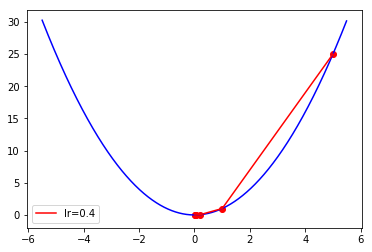

In [5]:
t = np.arange(-5.5, 5.5, 0.01)
plt.plot(t, L(t), c='b')
plt.plot(w_gd, L(w_gd), c='r', label='lr={}'.format(lr))    
plt.scatter(w_gd, L(w_gd), c='r')    
plt.legend()
plt.show()

#### 2D

In [6]:
def L(w1, w2):
    return w1**2 + w2**2

def dL(w):
    return np.array([2*w[0], 2*w[1]])

In [7]:
def gradient_descent(w_start, df, lr, epochs):
    w1_gd = []
    w2_gd = []
    w1_gd.append(w_start[0])
    w2_gd.append(w_start[1]) 
    pre_w = w_start

    for i in range(epochs):
        w = pre_w - lr*df(pre_w)
        w1_gd.append(w[0])
        w2_gd.append(w[1])
        pre_w = w

    return np.array(w1_gd), np.array(w2_gd)

In [8]:
w0 = np.array([2, 4])
lr = 0.1
epochs = 40

x1 = np.arange(-5, 5, 0.05)
x2 = np.arange(-5, 5, 0.05)

w1, w2 = np.meshgrid(x1, x2)

In [9]:
w1_gd, w2_gd = gradient_descent(w0, dL, lr, epochs)
w_gd = np.column_stack([w1_gd, w2_gd])
print(w_gd)

[[2.00000000e+00 4.00000000e+00]
 [1.60000000e+00 3.20000000e+00]
 [1.28000000e+00 2.56000000e+00]
 [1.02400000e+00 2.04800000e+00]
 [8.19200000e-01 1.63840000e+00]
 [6.55360000e-01 1.31072000e+00]
 [5.24288000e-01 1.04857600e+00]
 [4.19430400e-01 8.38860800e-01]
 [3.35544320e-01 6.71088640e-01]
 [2.68435456e-01 5.36870912e-01]
 [2.14748365e-01 4.29496730e-01]
 [1.71798692e-01 3.43597384e-01]
 [1.37438953e-01 2.74877907e-01]
 [1.09951163e-01 2.19902326e-01]
 [8.79609302e-02 1.75921860e-01]
 [7.03687442e-02 1.40737488e-01]
 [5.62949953e-02 1.12589991e-01]
 [4.50359963e-02 9.00719925e-02]
 [3.60287970e-02 7.20575940e-02]
 [2.88230376e-02 5.76460752e-02]
 [2.30584301e-02 4.61168602e-02]
 [1.84467441e-02 3.68934881e-02]
 [1.47573953e-02 2.95147905e-02]
 [1.18059162e-02 2.36118324e-02]
 [9.44473297e-03 1.88894659e-02]
 [7.55578637e-03 1.51115727e-02]
 [6.04462910e-03 1.20892582e-02]
 [4.83570328e-03 9.67140656e-03]
 [3.86856262e-03 7.73712525e-03]
 [3.09485010e-03 6.18970020e-03]
 [2.475880

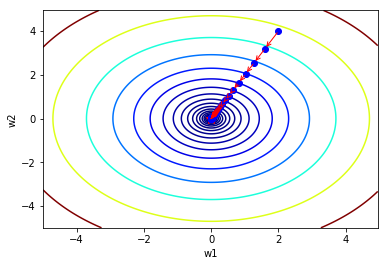

In [10]:
fig1, ax1 = plt.subplots()
ax1.contour(w1, w2, L(w1, w2), levels=np.logspace(-3, 3, 30), cmap='jet')
min_point = np.array([0., 0.])
min_point_ = min_point[:, np.newaxis]
ax1.plot(*min_point_, L(*min_point_), 'r*', markersize=10)
ax1.set_xlabel('w1')
ax1.set_ylabel('w2')

ax1.plot(w1_gd, w2_gd, 'bo')
for i in range(1, epochs+1):
    ax1.annotate('', xy=(w1_gd[i], w2_gd[i]), 
                   xytext=(w1_gd[i-1], w2_gd[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
plt.show()